<a href="https://colab.research.google.com/github/Soares820/Regress-o-Linear-IA/blob/main/Trabalho_de_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import io # Importar o módulo io para lidar com dados em memória
from google.colab import files # Importar files para o upload

In [6]:
# Assume que o arquivo já foi carregado em um passo anterior e está em `uploaded`
# Se não, descomente as linhas abaixo para carregar o arquivo novamente
# uploaded = files.upload()
# file_name = list(uploaded.keys())[0]
# df = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding="latin1", sep=";")


# Print the column names to inspect them
print("Column names in the DataFrame:")
print(df.columns)


Column names in the DataFrame:
Index(['Data', '7483 - Cesta básica - Curitiba - u.m.c.',
       '7484 - Cesta básica - Florianópolis - u.m.c.',
       '7486 - Cesta básica - Goiânia - u.m.c.',
       '7489 - Cesta básica - Porto Alegre - u.m.c.',
       '7491 - Cesta básica - Rio de Janeiro - u.m.c.',
       '7493 - Cesta básica - São Paulo - u.m.c.', 'Ano', 'Mes'],
      dtype='object')


In [7]:
# Remove linhas com valores ausentes que podem ter sido criados pela conversão
df.dropna(inplace=True)

In [9]:
# Converte a coluna de data para datetime e extrai ano e mês
# O formato esperado é "%m/%Y" (mês/ano)
df['Data'] = pd.to_datetime(df['Data'], format="%m/%Y")
df['Ano'] = df['Data'].dt.year
df['Mes'] = df['Data'].dt.month

In [10]:
# Define a variável alvo (y) e os preditores (X)
# Replace 'Cesta básica - Curitiba - u.m.c.' with the correct column name after inspecting the output
y = df['7483 - Cesta básica - Curitiba - u.m.c.'] # Changed to the column name found in the df.head() output
X = df[['Ano', 'Mes']]


In [11]:
# Divide os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Cria e treina o modelo de Regressão Linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [13]:
# Faz previsões usando o conjunto de teste
y_pred = modelo.predict(X_test)

In [14]:
# Avalia o desempenho do modelo
print("Coeficiente de Determinação (R²):", r2_score(y_test, y_pred))
print("Erro Quadrático Médio (MSE):", mean_squared_error(y_test, y_pred))

Coeficiente de Determinação (R²): 0.8908109068425867
Erro Quadrático Médio (MSE): 4436.340082478734


In [15]:
# Visualização dos resultados
plt.figure(figsize=(10, 6)) # Define o tamanho da figura


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

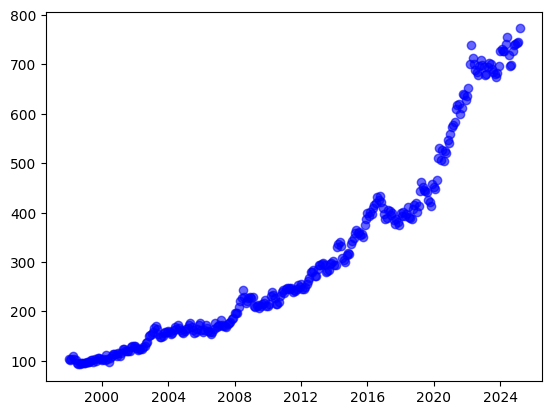

In [16]:
# Plota os dados reais
plt.scatter(df['Data'], y, label='Real', color='blue', alpha=0.6)

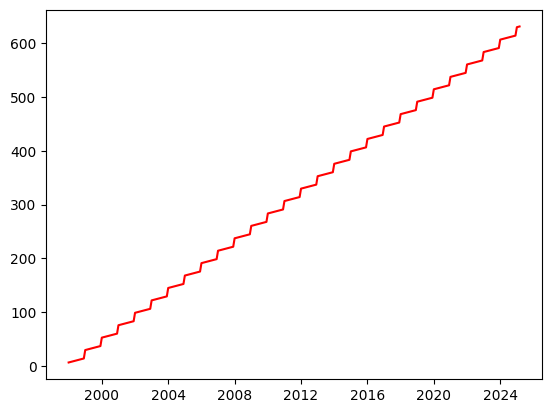

In [17]:
# Plota a linha de regressão. Para isso, predizemos usando todos os dados originais
# para ter uma linha de tendência que abrange todo o período.
# Certifique-se que X para a predição da linha de regressão seja um DataFrame com as colunas 'Ano' e 'Mes'
plt.plot(df['Data'], modelo.predict(df[['Ano', 'Mes']]), color='red', label='Regressão')

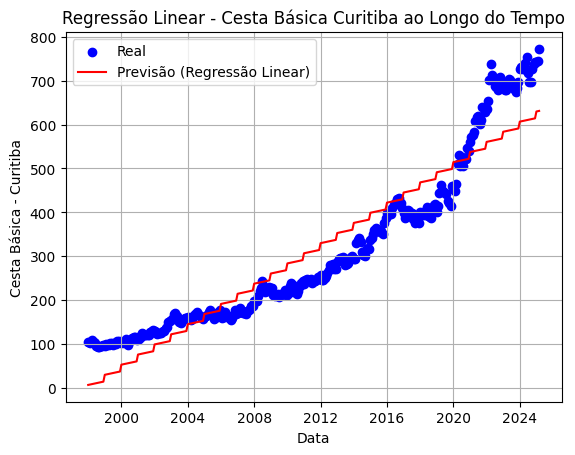

In [19]:
# Visualização corrigida com labels
plt.scatter(df['Data'], y, label='Real', color='blue')
plt.plot(df['Data'], modelo.predict(df[['Ano', 'Mes']]), color='red', label='Previsão (Regressão Linear)')
plt.xlabel('Data')  # O eixo x agora representa a data completa
plt.ylabel('Cesta Básica - Curitiba')
plt.title('Regressão Linear - Cesta Básica Curitiba ao Longo do Tempo')
plt.legend()  # Agora existem labels para a legenda
plt.grid(True)
plt.show()
